In [1]:
# pip install pandas openpyxl

In [16]:
import pandas as pd

# Read the Excel file
xlsx_file = 'sales_data.xlsx'  # Replace with your actual file name
df = pd.read_excel(xlsx_file)

# Convert to CSV
csv_file = 'sales_data.csv'  # Desired CSV file name
df.to_csv(csv_file, index=False)

print(f"Successfully converted {xlsx_file} to {csv_file}")


Successfully converted sales_data.xlsx to sales_data.csv


**Recommended Steps or Actions to Complete the Tasks**

**1) Cleaned Dataset**

*1) Inspect the Dataset*

In [17]:
import pandas as pd
# Step 1: Load the CSV File
df = pd.read_csv("sales_data.csv")  # Replace with your actual filename

# Step 1: Inspect the Dataset
print("Dataset Info:")
print(df.info())           # See column types and missing values
print("\nFirst 5 Rows:")
print(df.head())           # Preview data
print("\nMissing Values per Column:")
print(df.isnull().sum())   # Count missing values


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  20 non-null     int64  
 1   Date            20 non-null     object 
 2   Customer_ID     20 non-null     object 
 3   Product         20 non-null     object 
 4   Category        20 non-null     object 
 5   Quantity        20 non-null     int64  
 6   Price           20 non-null     int64  
 7   Total_Amount    19 non-null     float64
 8   Payment_Method  20 non-null     object 
 9   Region          20 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.7+ KB
None

First 5 Rows:
   Transaction_ID        Date Customer_ID     Product     Category  Quantity  \
0            1001  2024-01-05        C001      Laptop  Electronics         1   
1            1002  2024-01-10        C002  Smartphone  Electronics         2   
2            1003  20

*2) Remove Duplicates*

In [18]:
# Step 2: Remove Duplicates
df = df.drop_duplicates()
print(df.head())

   Transaction_ID        Date Customer_ID     Product     Category  Quantity  \
0            1001  2024-01-05        C001      Laptop  Electronics         1   
1            1002  2024-01-10        C002  Smartphone  Electronics         2   
2            1003  2024-01-12        C003  Headphones  Electronics         1   
3            1004  2024-02-05        C004      Tablet  Electronics         1   
4            1005  2024-02-08        C005        Book        Books         3   

   Price  Total_Amount Payment_Method Region  
0    800           NaN    Credit Card  North  
1    600        1200.0           Cash  South  
2    100         100.0         PayPal   West  
3    500         500.0     Debit Card   East  
4     20          60.0    Credit Card  North  


*3) Handle Missing Values*

In [5]:
# Option 1: Drop rows where critical numeric data like Total_Amount is missing
df = df.dropna(subset=["Total_Amount"])

In [6]:
# Option 2: Fill numeric missing values with mean or median (if any)
df["Price"] = df["Price"].fillna(df["Price"].mean())
df["Quantity"] = df["Quantity"].fillna(df["Quantity"].median())

In [ ]:
# Option 3: Fill categorical missing values with most frequent (mode)
for col in ["Payment_Method", "Region", "Product", "Category"]:
    df[col] = df[col].fillna(df[col].mode()[0])

*4) Standardise Formats*

In [8]:
# Convert Date to datetime format (YYYY-MM-DD)
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Ensure correct data types
df["Quantity"] = df["Quantity"].astype(int)
df["Price"] = df["Price"].astype(float)
df["Total_Amount"] = df["Total_Amount"].astype(float)

*5) Export the Cleaned Dataset*

In [9]:
df.to_csv("cleaned_dataset.csv", index=False)
df.to_excel("cleaned_dataset.xlsx", index=False)

**2) Exploratory Data Analysis** 

*1) Understand the Dataset*


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Cleaned Dataset
df = pd.read_csv("cleaned_dataset.csv")  # or .xlsx with pd.read_excel()

# Step 1: Understand the Dataset
print("First 5 Rows:\n", df.head())
print("\nData Types:\n", df.dtypes)
print("\nColumns:\n", df.columns.tolist())

# Identify categorical and numerical features
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

First 5 Rows:
    Transaction_ID        Date Customer_ID     Product     Category  Quantity  \
0            1002  2024-01-10        C002  Smartphone  Electronics         2   
1            1003  2024-01-12        C003  Headphones  Electronics         1   
2            1004  2024-02-05        C004      Tablet  Electronics         1   
3            1005  2024-02-08        C005        Book        Books         3   
4            1006  2024-02-10        C001      Laptop  Electronics         1   

   Price  Total_Amount Payment_Method Region  
0  600.0        1200.0           Cash  South  
1  100.0         100.0         PayPal   West  
2  500.0         500.0     Debit Card   East  
3   20.0          60.0    Credit Card  North  
4  800.0         800.0    Credit Card  North  

Data Types:
 Transaction_ID      int64
Date               object
Customer_ID        object
Product            object
Category           object
Quantity            int64
Price             float64
Total_Amount      float64


*2)Summary Statistics and Key Trends*


Summary Statistics:
        Transaction_ID   Quantity       Price  Total_Amount
count       19.000000  19.000000   19.000000     19.000000
mean      1011.000000   1.578947  300.526316    375.263158
std          5.627314   0.901591  288.814121    389.067524
min       1002.000000   1.000000   20.000000     25.000000
25%       1006.500000   1.000000   37.500000     77.500000
50%       1011.000000   1.000000  200.000000    200.000000
75%       1015.500000   2.000000  550.000000    550.000000
max       1020.000000   4.000000  800.000000   1200.000000


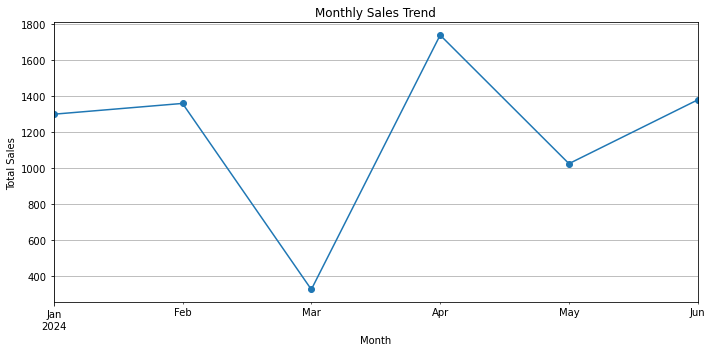

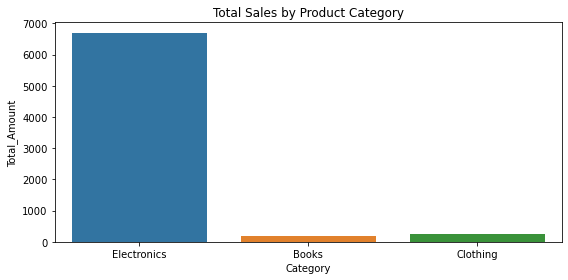

In [20]:
# Summary statistics for numerical columns
print("\nSummary Statistics:\n", df[numerical_cols].describe())

# Monthly sales trend
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Total_Amount"].sum()

# Plot monthly sales trend
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind="line", marker='o', title="Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

# Product Category Trend
plt.figure(figsize=(8, 4))
sns.barplot(x="Category", y="Total_Amount", data=df, estimator=sum, ci=None)
plt.title("Total Sales by Product Category")
plt.tight_layout()
plt.show()

*3) Correlation Analysis*


Correlation Matrix:
                 Transaction_ID  Quantity     Price  Total_Amount
Transaction_ID        1.000000  0.054750  0.011964     -0.122814
Quantity              0.054750  1.000000 -0.402340     -0.170714
Price                 0.011964 -0.402340  1.000000      0.890350
Total_Amount         -0.122814 -0.170714  0.890350      1.000000


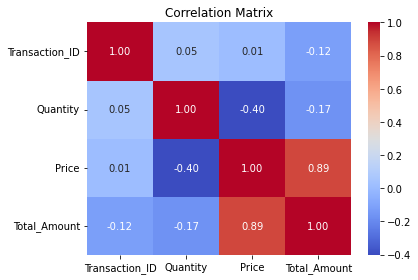

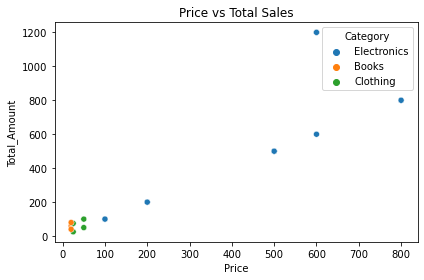

In [21]:
# Correlation Matrix
corr_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:\n", corr_matrix)

# Heatmap for correlations
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Optional: Scatterplot for Price vs Total_Amount
sns.scatterplot(x="Price", y="Total_Amount", hue="Category", data=df)
plt.title("Price vs Total Sales")
plt.tight_layout()
plt.show()

*4) Write the EDA Summary (Template)*

* 1. Sales Over Time – Line Graph*

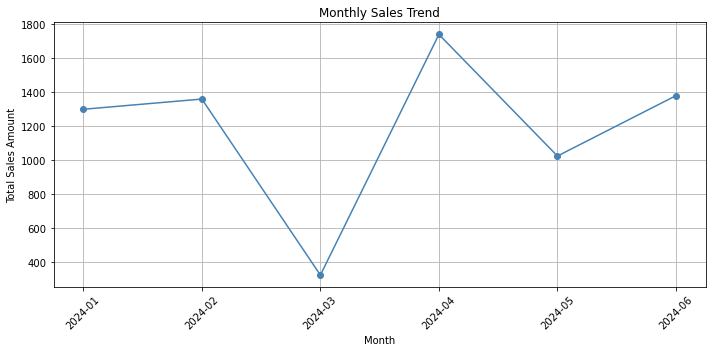

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("cleaned_dataset.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")

# Group by month and calculate total sales
monthly_sales = df.groupby("Month")["Total_Amount"].sum().reset_index()

# Plot line graph
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales["Month"].astype(str), monthly_sales["Total_Amount"], marker='o', color='steelblue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

*Sales by Product Category – Bar Chart*

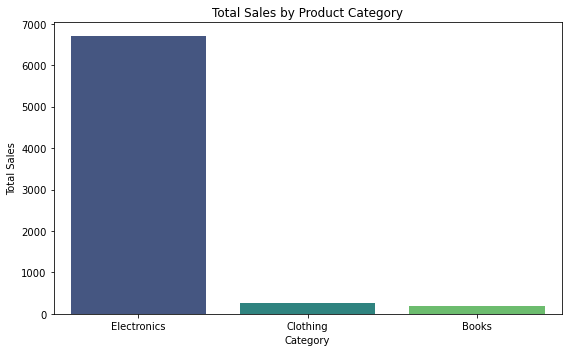

In [23]:
# Group by category and sum total sales
category_sales = df.groupby("Category")["Total_Amount"].sum().reset_index().sort_values(by="Total_Amount", ascending=False)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x="Category", y="Total_Amount", data=category_sales, palette="viridis")
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

* Correlation Heatmap* 

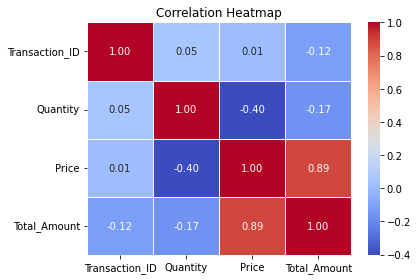

In [24]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
